In [8]:
import numpy as np
import json
import matplotlib.pyplot as plt
import sippy
from sippy import functionset as fset
from sippy import functionsetSIM as fsetSIM

# Load data
Load measured step response data

In [3]:
with open('response_1.json') as json_file:
    data = json.load(json_file)
n_points = len(data)
data[0:3]

[{'ts': '2020-08-25 10:55:02',
  't': 0,
  'duty': 100,
  'T_boiler': 25.970787048339844},
 {'ts': '2020-08-25 10:55:03',
  't': 1,
  'duty': 100,
  'T_boiler': 25.995746612548828},
 {'ts': '2020-08-25 10:55:11',
  't': 9,
  'duty': 0,
  'T_boiler': 26.837848663330078}]

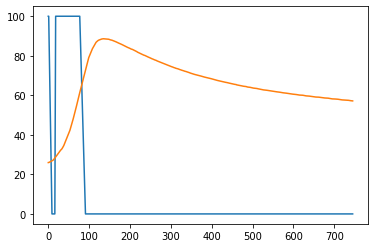

In [4]:
data_array = np.zeros((n_points, 3))

for index, item in enumerate(data):
    data_array[index, 0] = item["t"]
    data_array[index, 1] = item["duty"]
    data_array[index, 2] = item["T_boiler"]
# data_array
plt.plot(data_array[:,0], data_array[:,1])
plt.plot(data_array[:,0], data_array[:,2])

## Trim
Trim to start at 0 duty

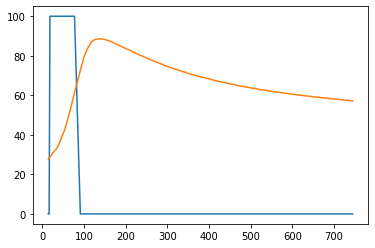

In [6]:
data_array = data_array[2:, :]
plt.plot(data_array[:,0], data_array[:,1])
plt.plot(data_array[:,0], data_array[:,2])

# Fit model

In [34]:
t = data_array[:,0].reshape((1,-1))
u = data_array[:,1].reshape((1,-1))
y = data_array[:,2].reshape((1,-1))

##System identification
method = 'PARSIM-K'
sys_id = sippy.system_identification(y, u, method, SS_fixed_order=2)
xid, yid = fsetSIM.SS_lsim_process_form(sys_id.A, sys_id.B, sys_id.C, sys_id.D, u, sys_id.x0)

Text(0.5, 1.0, 'Input')

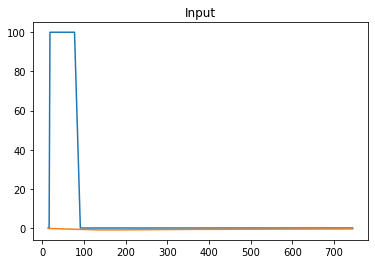

In [35]:
plt.plot(t[0], u[0])
plt.plot(t[0], xid[0])
plt.title("Input")

Text(0.5, 1.0, 'Output')

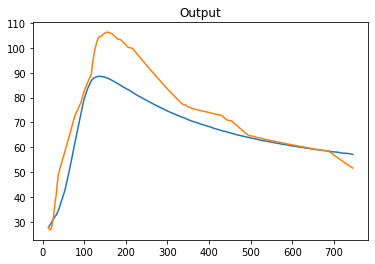

In [36]:
plt.plot(t[0], y[0])
plt.plot(t[0], yid[0])
plt.title("Output")

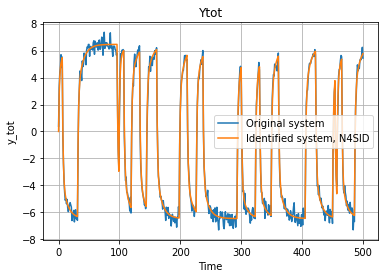

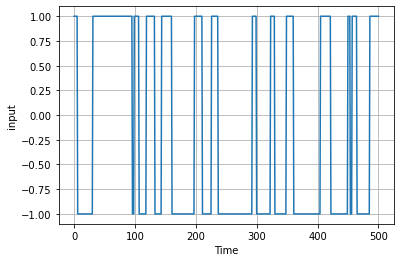

In [7]:
from __future__ import division

from past.utils import old_div

# Checking path to access other files
try:
    from sippy import *
except ImportError:
    import sys, os

    sys.path.append(os.pardir)
    from sippy import *

import numpy as np
from sippy import functionset as fset
from sippy import functionsetSIM as fsetSIM

ts = 1.0

A = np.array([[0.89, 0.], [0., 0.45]])
B = np.array([[0.3], [2.5]])
C = np.array([[0.7, 1.]])
D = np.array([[0.0]])

tfin = 500
npts = int(old_div(tfin, ts)) + 1
Time = np.linspace(0, tfin, npts)

# Input sequence
U = np.zeros((1, npts))
U[0] = fset.GBN_seq(npts, 0.05)

##Output
x, yout = fsetSIM.SS_lsim_process_form(A, B, C, D, U)

# measurement noise
noise = fset.white_noise_var(npts, [0.15])

# Output with noise
y_tot = yout + noise

##System identification
method = 'N4SID'
sys_id = system_identification(y_tot, U, method, SS_fixed_order=2)
xid, yid = fsetSIM.SS_lsim_process_form(sys_id.A, sys_id.B, sys_id.C, sys_id.D, U, sys_id.x0)

import matplotlib.pyplot as plt

plt.close("all")
plt.figure(0)
plt.plot(Time, y_tot[0])
plt.plot(Time, yid[0])
plt.ylabel("y_tot")
plt.grid()
plt.xlabel("Time")
plt.title("Ytot")
plt.legend(['Original system', 'Identified system, ' + method])

plt.figure(1)
plt.plot(Time, U[0])
plt.ylabel("input")
plt.grid()
plt.xlabel("Time")

plt.show()